In [ ]:
# the bare minimum
import matplotlib.pyplot as plt  # for plotting
import geopandas as gpd  # for geospatial data handling
from matplotlib.lines import Line2D

# more advanced
from lonboard._map import Map
from lonboard._layer import PolygonLayer  # for mapping in 3D
from lonboard.colormap import (
    apply_categorical_cmap,
    apply_continuous_cmap,
)  # for assigning colors
from palettable.colorbrewer.sequential import PuRd_9  # for color palettes
from matplotlib.colors import LogNorm  # for logarithmic normalization
import pygwalker as pyg  # for creating interactive data visualizations

In [ ]:
#load file and I got the data from here: https://data.iledefrance.fr/explore/dataset/ilots-de-chaleur-urbains-icu-classification-des-imu-en-zone-climatique-locale-lc/information/
ilots_df = gpd.read_file('./Data_Assignment1/Ilots_de_chaleur_Urbains_(ICU)_%3A_classification_des_IMU_en_zone_climatique_locale_(LCZ)_%2C_Al%C3%A9as_et_Vuln%C3%A9rabilit%C3%A9s_%C3%A0_la_chaleur_de_Jour_et_de_Nuit_en_%C3%8Ele-de-France.geojson')

In [7]:
ilots_df.head() # Display the first few rows of the DataFrame

,objectid,code_imu,type_lcz,lcz1,lcz2,svf,aspecratio,hauteurmoy,perméable,voirie,...,sensi_j_cl,incap_j_cl,alea_n_cl,sensi_n_cl,incap_n_cl,vulnj_note,vulnn_note,st_areashape,st_lengthshape,geometry
0,1,75000001,D.e,D,E,1.0,0.10,2.578087,24.17391,75.463633,...,1,2,1,1,2,5,4,3023.804756,289.890018,"POLYGON Z ((2.37167 48.72039 0, 2.3716 48.7204..."
1,2,75000002,E,E,,1.0,0.25,4.031836,0.00000,99.204088,...,1,2,1,1,2,6,4,4554.525868,387.824930,"POLYGON Z ((2.37184 48.72358 0, 2.37296 48.723..."
2,3,75000003,E,E,,0.9,0.20,6.100001,0.00000,87.032147,...,1,2,1,1,2,6,4,464.349655,186.282546,"POLYGON Z ((2.37333 48.72383 0, 2.37337 48.723..."
3,4,75000004,5,5,,1.0,0.10,0.000000,65.20550,34.794500,...,1,2,1,1,2,4,4,1151.253374,236.114336,"POLYGON Z ((2.37159 48.72967 0, 2.37159 48.729..."
4,5,75000005,5,5,,1.0,0.10,0.000000,51.28228,48.717720,...,1,2,1,1,2,5,4,1250.574039,261.161917,"POLYGON Z ((2.37103 48.72931 0, 2.37103 48.729..."


In [8]:
# View columns 
ilots_df.columns

Index(['objectid', 'code_imu', 'type_lcz', 'lcz1', 'lcz2', 'svf', 'aspecratio',
       'hauteurmoy', 'perméable', 'voirie', 'bati', 'rugosite_t', 'admitance',
       'albedo', 'fluchaleur', 'aleaj_note', 'alean_note', 'alea_j_cl',
       'sensi_j_cl', 'incap_j_cl', 'alea_n_cl', 'sensi_n_cl', 'incap_n_cl',
       'vulnj_note', 'vulnn_note', 'st_areashape', 'st_lengthshape',
       'geometry'],
      dtype='object')

<Axes: >

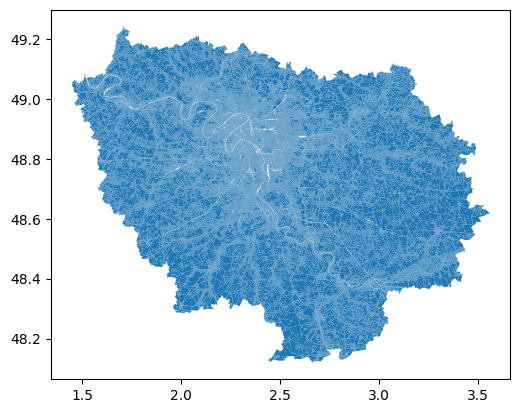

In [36]:
#view layout of data in a map (not sybolized)
ilots_df.plot()

In [37]:
# I want to see the columns again 
ilots_df.columns

Index(['objectid', 'code_imu', 'type_lcz', 'lcz1', 'lcz2', 'svf', 'aspecratio',
       'hauteurmoy', 'perméable', 'voirie', 'bati', 'rugosite_t', 'admitance',
       'albedo', 'fluchaleur', 'aleaj_note', 'alean_note', 'alea_j_cl',
       'sensi_j_cl', 'incap_j_cl', 'alea_n_cl', 'sensi_n_cl', 'incap_n_cl',
       'vulnj_note', 'vulnn_note', 'st_areashape', 'st_lengthshape',
       'geometry'],
      dtype='object')

In [40]:
# I am going to look at 'admitance' - this is the heat admittance of the surface, which is a measure of how much heat the surface can absorb and release.
print(ilots_df['admitance'].max())
print(ilots_df['admitance'].min())
print(ilots_df['admitance'].mean())

2150.0
1100.0
1524.541205899253


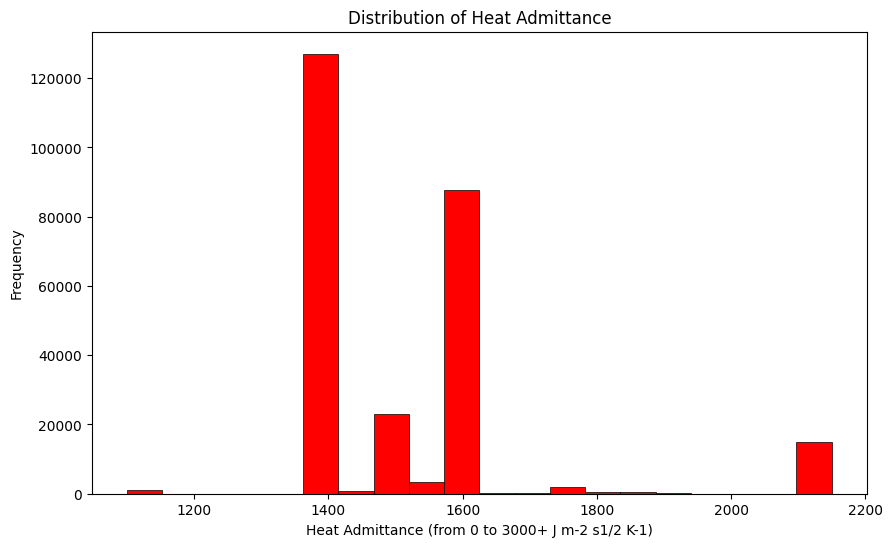

In [47]:
ilots_df.hist(column='admitance', bins=20, figsize=(10, 6), facecolor='red', edgecolor='black', linewidth=.5, grid=False)
plt.title('Distribution of Heat Admittance')
plt.xlabel('Heat Admittance (from 0 to 3000+ J m-2 s1/2 K-1)')
plt.ylabel('Frequency')
plt.show()

c:\Users\sd371\anaconda3\envs\cdp\Lib\site-packages\mapclassify\classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


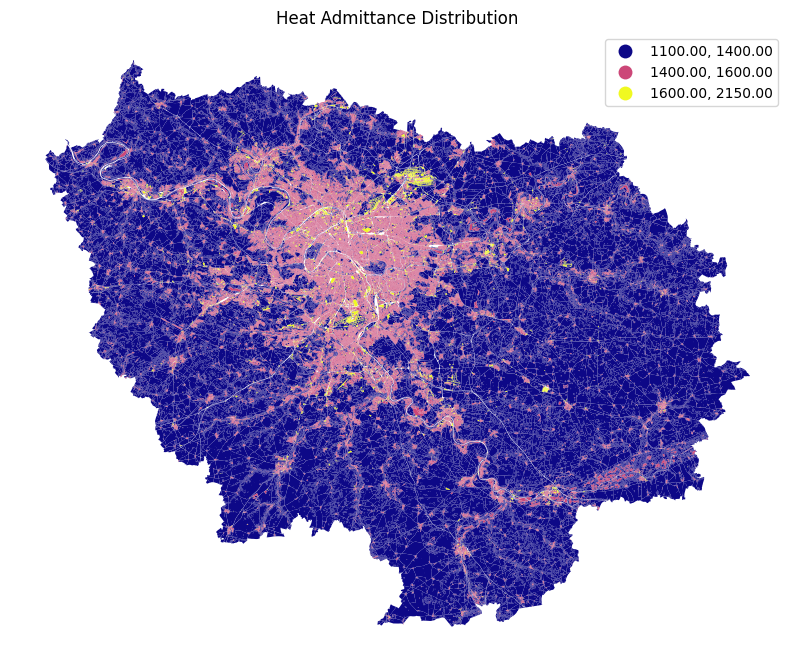

In [53]:
ax = ilots_df.plot(column='admitance', cmap='plasma', scheme='quantiles', k=5, legend=True, figsize=(10, 10))
ax.set_title('Heat Admittance Distribution')
ax.set_axis_off()
plt.show()

In [54]:
# scale is too big I want to see Paris (this is Ile de France) 
# I am going to clip by loading in the paris city boundary 
paris_boundary = gpd.read_file('./Data_Assignment1/paris.geojson')

In [60]:
# This returns a boolean Series of invalid geometries
invalid_geoms = ilots_df[~ilots_df.is_valid]
print(f"Number of invalid geometries: {len(invalid_geoms)}")

Number of invalid geometries: 853


In [ ]:
from shapely.validation import make_valid

ilots_df['geometry'] = ilots_df['geometry'].apply(make_valid) # using this package to fix invalid geometries

In [62]:
print(f"Remaining invalid geometries: {(~ilots_df.is_valid).sum()}")

Remaining invalid geometries: 0


In [ ]:
paris_ilots = gpd.clip(ilots_df, paris_boundary) # this is where I am clipping the data to only show Paris

<Axes: >

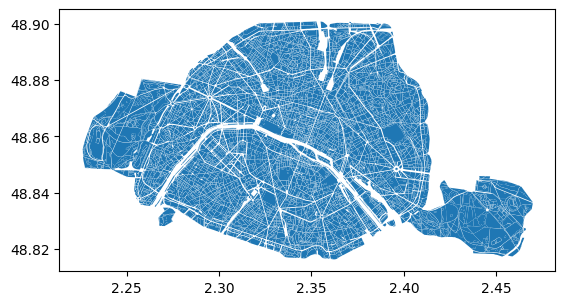

In [64]:
paris_ilots.plot()

c:\Users\sd371\anaconda3\envs\cdp\Lib\site-packages\mapclassify\classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


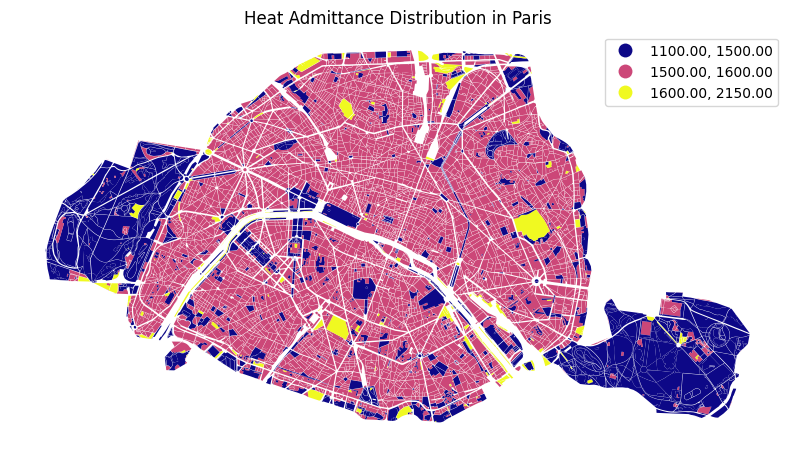

In [67]:
# now lets visualize the Heat Admittance in Paris
ax_paris = paris_ilots.plot(column='admitance', cmap='plasma', scheme='quantiles', k=5, legend=True, figsize=(10, 10))
ax_paris.set_title('Heat Admittance Distribution in Paris')
ax_paris.set_axis_off()

In [68]:
paris_ilots.columns

Index(['objectid', 'code_imu', 'type_lcz', 'lcz1', 'lcz2', 'svf', 'aspecratio',
       'hauteurmoy', 'perméable', 'voirie', 'bati', 'rugosite_t', 'admitance',
       'albedo', 'fluchaleur', 'aleaj_note', 'alean_note', 'alea_j_cl',
       'sensi_j_cl', 'incap_j_cl', 'alea_n_cl', 'sensi_n_cl', 'incap_n_cl',
       'vulnj_note', 'vulnn_note', 'st_areashape', 'st_lengthshape',
       'geometry'],
      dtype='object')

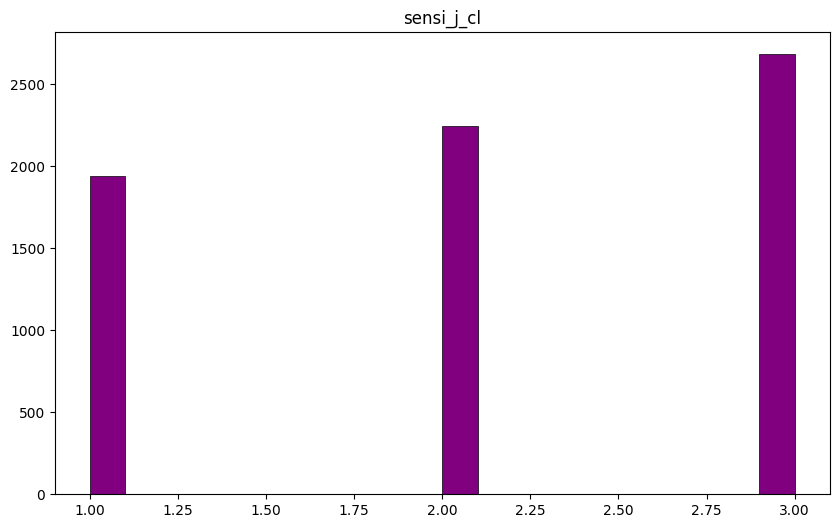

In [80]:
#now I want to see the sensitivity to daytime heat
ax = paris_ilots.hist(column='sensi_j_cl', bins=20, figsize=(10, 6), facecolor='purple', edgecolor='black', linewidth=.5, grid=False)

<Axes: >

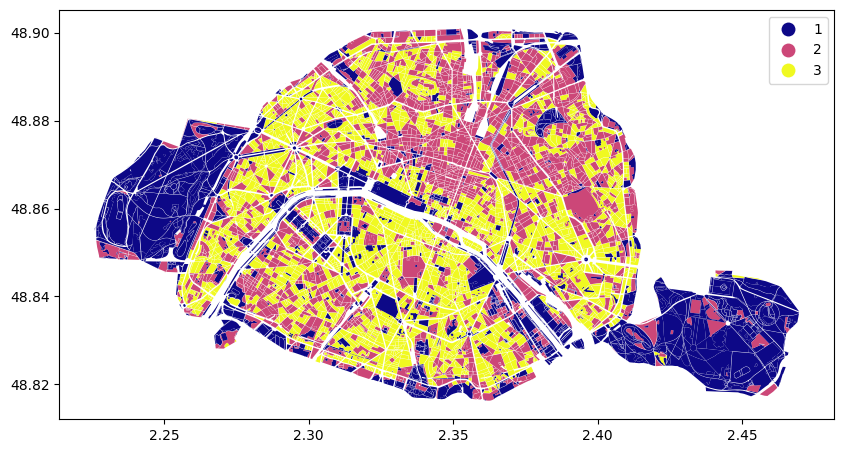

In [82]:
paris_ilots.plot(column='sensi_j_cl', cmap='plasma', legend=True, categorical=True, figsize=(10, 10))

<Axes: >

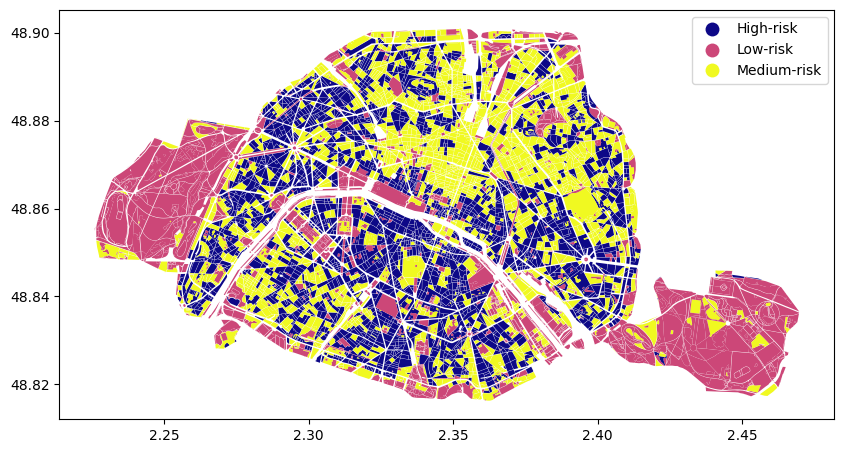

In [83]:
# I am going to change the categories from 1 to 3, to Low-risk, Medium-risk, and High-risk
paris_ilots['sensi_j_cl'] = paris_ilots['sensi_j_cl'].replace({1: 'Low-risk', 2: 'Medium-risk', 3: 'High-risk'})
paris_ilots.plot(column='sensi_j_cl', cmap='plasma', legend=True, categorical=True, figsize=(10, 10))   

Text(0.5, 0, 'Sensitivity to Daytime Heat')

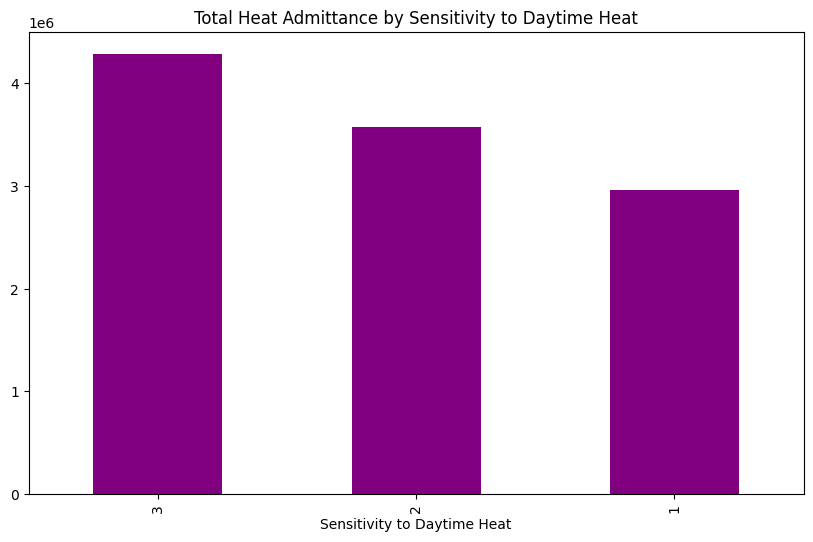

In [ ]:
#now i want to see the total heat admittance by sensitivity to daytime heat
ax = paris_ilots.groupby('sensi_j_cl').admitance.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='purple')
ax.set_title('Total Heat Admittance by Sensitivity to Daytime Heat')
ax.set_xlabel('Sensitivity to Daytime Heat')   

In [84]:
paris_ilots_wgs = paris_ilots.to_crs(epsg=4326)  # Convert to WGS84 for web mapping

In [109]:
paris_ilots_wgs['Sensitivity'] = paris_ilots_wgs['sensi_j_cl'].astype(str)  # Convert to string for categorical mapping
paris_ilots_wgs.columns

Index(['objectid', 'code_imu', 'type_lcz', 'lcz1', 'lcz2', 'svf', 'aspecratio',
       'hauteurmoy', 'perméable', 'voirie', 'bati', 'rugosite_t', 'admitance',
       'albedo', 'fluchaleur', 'aleaj_note', 'alean_note', 'alea_j_cl',
       'sensi_j_cl', 'incap_j_cl', 'alea_n_cl', 'sensi_n_cl', 'incap_n_cl',
       'vulnj_note', 'vulnn_note', 'st_areashape', 'st_lengthshape',
       'geometry', 'Sensitivity'],
      dtype='object')

In [99]:
paris_ilots_wgs['sensi_j_cl'] = paris_ilots_wgs['sensi_j_cl'].astype(str)

In [115]:
%pip install geodatasets
import geodatasets


   -------------------- ------------------- 1/2 [geodatasets]
   ---------------------------------------- 2/2 [geodatasets]

Note: you may need to restart the kernel to use updated packages.


In [123]:
m = paris_ilots_wgs.explore(
    column="Sensitivity",  # make choropleth based on "BoroName" column
    tooltip="Sensitivity",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Set1",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black", linewidth=.5),  # use black outline
)

In [118]:
%pip install streamlit

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema-4.24.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.1 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/10.1 MB 2.7 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/10.1 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/10.1 MB 2.4 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/10.1 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/10.1 MB 2.7 MB/s eta 0:00:03
   ----------------- ---------------------- 4

In [ ]:
import streamlit as st
import folium

In [122]:
%pip install streamlit_folium 
from streamlit_folium import st_folium


Note: you may need to restart the kernel to use updated packages.


2025-07-10 15:07:34.585 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [124]:
# Streamlit layout
st.title("Interactive Map of Paris Sensitivity Zones")
st.write("Use the map below to explore sensitivity levels across Paris urban ilots.")

# Display the folium map in Streamlit
st_folium(m, width=700, height=500)

2025-07-10 15:08:09.985 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 15:08:10.437 
  command:

    streamlit run C:\Users\sd371\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-10 15:08:10.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 15:08:10.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 15:08:10.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 15:08:10.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 15:08:10.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 15:08:16.965 Thre

{'last_clicked': None,
 'last_object_clicked': None,
 'last_object_clicked_tooltip': None,
 'last_object_clicked_popup': None,
 'all_drawings': None,
 'last_active_drawing': None,
 'bounds': {'_southWest': {'lat': 48.81626629007767, 'lng': 2.225929},
  '_northEast': {'lat': 48.90099057099961, 'lng': 2.469746620623096}},
 'zoom': 10,
 'last_circle_radius': None,
 'last_circle_polygon': None,
 'selected_layers': None}